<center><h1>Inteligencia Artificial</header1></center>

Presentado por: Enriquez Selena y Johana Salazar  <br>
Fecha: DD/MM/2022

# Importación de librerias necesarias

In [54]:
#Para esta actividad se importarán las siguientes librerías:
import cv2
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import shutil
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from  PIL  import Image
from rembg import remove
from sklearn.preprocessing import MinMaxScaler
import h5py
from time import sleep
from sklearn.model_selection import train_test_split
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization,LayerNormalization

## Cargar el Dataset

In [21]:
#Procedemos a cargar las imagenes para lo cual especificamos el nombre del archivo
images_path = "./proyectoIA"
#images_path = "/Users/johan/Downloads/principal/proyectoIA"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['ArroboMercy', 'EnriquezSelena', 'Jhon Zambrano', 'LeonardoBorja', 'SalazarJohana']


## Descripción de la fuente

    Las imagenes se encuantran en una carpeta denominada "proyectoIA",se procede a cargar  imagenes de caracteristicas distintas. Dichas imagenes sera utilizados entrenar el modelo que permita la autenticacion del ususario por medio de un aplicativo.En el cual las imagenes seran entrenadas para la dicha autenticacion.

## Explique el problema a resolver. 

En el siguiente trabajo usamos imagenes que van a ser entrenadas por medio de un algoritmo supervisado. Para lograr esto se crea etiquetas con valores, esa información entrada y salida esperada. La red al entrenar ajustará los pesos de las Neuronas. La red a utilizar es Convolutional Neural Network, por ello necesitamos la libreria keras y tensorflow.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

Vamos a trabajar con un total de 3 imagenes por cada estudiante en este caso son 5 personas, dichas imagenes esen en formato png por lo tanto esoecificamos en la ruta. El tamaño que se maneja en las imagenes es de carnet americano. Aunque no tiene todas las mismas medidas con el preproceso se resuelve el problema.

In [ ]:
#Especificamos la carpeta donde se va a proceder a realizar el aumento
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    elements = os.listdir(cur_path)
    
    for element in elements:
        print("Copying Image - {} in proyectoIA_aument/{}".format(element, class_name))
        src = os.path.join(images_path + "/" + class_name, element) # origen
        dst = os.path.join("./proyectoIA_aument/" + class_name, element) 
        shutil.copy(src, dst)

In [4]:
"""Se define la rotacion, ancho, desplazamiento, el zoom y el rango de escala"""

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

In [5]:

"""Creando imagenes aumentadas para la carpeta de Mercy Arrobo   """
#ruta hacia la carpeta
os.chdir(r"\Users\johan\Downloads\proyectoIA_aument\ArroboMercy")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'ArroboMercy ', 
            save_format='png'):
        i += 1
        #Especificamos el numero de imagenes a aumentar en este caso necesitamos 9 imagenes de cada lado.
        #Para el aumento en cada carpeta serian 30 imagenes.
        if i == 9:      
            break  

In [6]:

"""Creando imagnes aumentadas para la carpeta de Johana Salazar """

os.chdir(r"\Users\johan\Downloads\proyectoIA_aument\SalazarJohana")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'SalazarJohana', 
            save_format='png'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [7]:

""" Creando imagnes aumentadas para la carpeta deEnriquez Selena"""
os.chdir(r"\Users\johan\Downloads\proyectoIA_aument\EnriquezSelena")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'EnriquezSelena', 
            save_format='png'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [8]:

"""Creando imagnes aumentadas para la carpeta de John Zambrano"""

os.chdir(r"\Users\johan\Downloads\proyectoIA_aument\Jhon Zambrano")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Jhon Zambrano', 
            save_format='png'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  

In [9]:

""" Creando imagnes aumentadas para la carpeta de Leonardo Borja """
os.chdir(r"\Users\johan\Downloads\proyectoIA_aument\LeonardoBorja")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'LeonardoBorja', 
            save_format='png'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break  


## NLM Filtro para eliminar el ruido de la imagen

In [10]:
"""Procedemos a la eliminacion del ruido de las imagenes en cada una de las carpetas de acada persona """


#os.chdir(r"/Users/johan/Downloads/")
os.chdir(r"/Users/johan/Downloads/")
images_path = "./proyectoIA_aument"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['ArroboMercy', 'EnriquezSelena', 'Jhon Zambrano', 'LeonardoBorja', 'SalazarJohana']


In [11]:
"""De las imagenes aumentadas obtenidas del codigo anterior se procede a procesar cada una con el fin de eliminar el ruido
Especificamos la carpeta del proceso y tambienla carpeta donde se guardan las imagenes sin ruido"""

for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    i = 1

    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # read the images path
        image = cv2.imread(file)
        # denoising images
        dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
        b,g,r = cv2.split(dst)
        rgb_dst = cv2.merge([r,g,b])
        # save images
        save_path = './proyectoIA_deniod/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        

        # show loop update
        i += 1

Processing Image - 1 in ArroboMercy
Processing Image - 2 in ArroboMercy
Processing Image - 3 in ArroboMercy
Processing Image - 4 in ArroboMercy
Processing Image - 5 in ArroboMercy
Processing Image - 6 in ArroboMercy
Processing Image - 7 in ArroboMercy
Processing Image - 8 in ArroboMercy
Processing Image - 9 in ArroboMercy
Processing Image - 10 in ArroboMercy
Processing Image - 11 in ArroboMercy
Processing Image - 12 in ArroboMercy
Processing Image - 13 in ArroboMercy
Processing Image - 14 in ArroboMercy
Processing Image - 15 in ArroboMercy
Processing Image - 16 in ArroboMercy
Processing Image - 17 in ArroboMercy
Processing Image - 18 in ArroboMercy
Processing Image - 19 in ArroboMercy
Processing Image - 20 in ArroboMercy
Processing Image - 21 in ArroboMercy
Processing Image - 22 in ArroboMercy
Processing Image - 23 in ArroboMercy
Processing Image - 24 in ArroboMercy
Processing Image - 25 in ArroboMercy
Processing Image - 26 in ArroboMercy
Processing Image - 27 in ArroboMercy
Processing


## Eliminacion de fondo

In [12]:
images_path = "./proyectoIA_deniod"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['ArroboMercy', 'EnriquezSelena', 'Jhon Zambrano', 'LeonardoBorja', 'SalazarJohana']


In [13]:
""" Procedemos a eliminar el fondo de todas las imagenes a la
cuales se les elimino el ruido. Dichas imagenes se guardaran en la carpeta proyectoIA_rgb  """
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    i = 1

    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # read the images path
        image = cv2.imread(file)
        # remove bg 
        output = remove(image)
        # save images ruta de la carpeta
        save_path = './proyectoIA_rgb/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'), output)
        

        # show loop update
        i += 1

Processing Image - 1 in ArroboMercy
Processing Image - 2 in ArroboMercy
Processing Image - 3 in ArroboMercy
Processing Image - 4 in ArroboMercy
Processing Image - 5 in ArroboMercy
Processing Image - 6 in ArroboMercy
Processing Image - 7 in ArroboMercy
Processing Image - 8 in ArroboMercy
Processing Image - 9 in ArroboMercy
Processing Image - 10 in ArroboMercy
Processing Image - 11 in ArroboMercy
Processing Image - 12 in ArroboMercy
Processing Image - 13 in ArroboMercy
Processing Image - 14 in ArroboMercy
Processing Image - 15 in ArroboMercy
Processing Image - 16 in ArroboMercy
Processing Image - 17 in ArroboMercy
Processing Image - 18 in ArroboMercy
Processing Image - 19 in ArroboMercy
Processing Image - 20 in ArroboMercy
Processing Image - 21 in ArroboMercy
Processing Image - 22 in ArroboMercy
Processing Image - 23 in ArroboMercy
Processing Image - 24 in ArroboMercy
Processing Image - 25 in ArroboMercy
Processing Image - 26 in ArroboMercy
Processing Image - 27 in ArroboMercy
Processing

## Carga y exploracion de datos

In [33]:
""" Empezamos a trabajar con as imagenes ya procesadas anteriormente,por cada persona tenemos 5 clases. """

fpath = './proyectoIA_rgb'
random_seed = 9

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['ArroboMercy', 'EnriquezSelena', 'Jhon Zambrano', 'LeonardoBorja', 'SalazarJohana'] 

No. of categories =  5


Para este paso procedemos a definir las categorias, los estudisntes elegidos tienen cada una de sus fotos almacenados en carpetas. Por ello a las imagenes anterirmente procesadas y eliminadas el fondo seras con las que trabajamos. Para cada uno selecionamos una categoria que va a ser identificada medinte el nombre de cada uno.  

In [56]:
""" Se agrega etiquetas para cada una de las categorias ya especificadas anteriormente, con un total de 
153 etiquetas sumando todas las clases"""

#Se agrega etiquetas para cada una de las categorias ya especificadas anteriormente
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            img_lst.append(np.array(img_array))
            
            labels.append(index)
    return img_lst, labels
#Etiquetas por cada una de las categorias
images, labels = load_images_and_labels(categories)
print("No. de imagenes cargadas = ",len(images),"\nNo. de etiquetas cargadas = ",len(labels))
print(type(images),type(labels))

No. de imagenes cargadas =  153 
No. de etiquetas cargadas =  153
<class 'list'> <class 'list'>


In [35]:
"""Las etiquetas de las imagenes las manejamos con numpy mediante un arreglo"""
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (153,) 
Labels shape =  (153,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


C:\Users\johan\AppData\Local\Temp\ipykernel_2332\1874007466.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


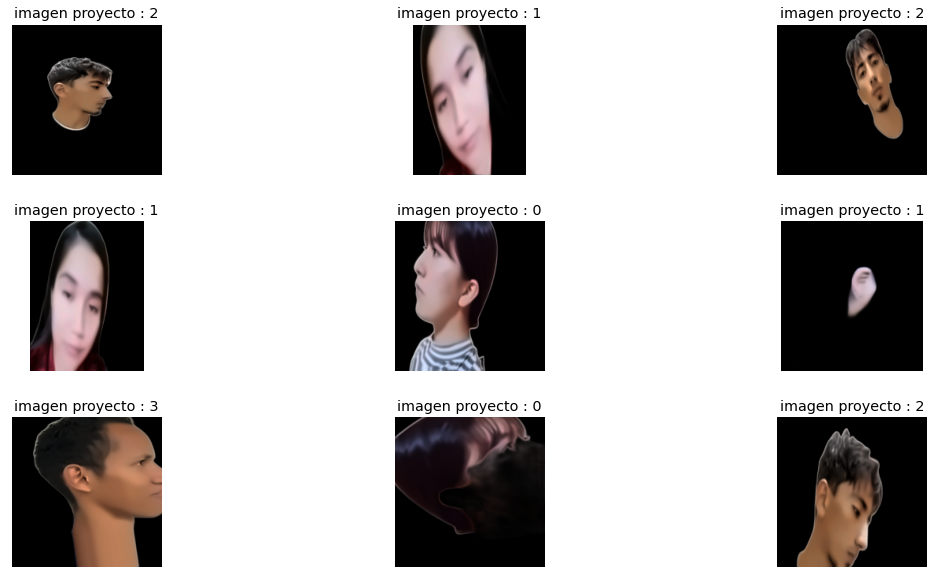

In [36]:
"""Mediante un plot extraemos imagenes aleatorias y las etiquetamos como imagen proyecto y el numero identificador"""
def display_rand_images(images, labels):

    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('imagen proyecto : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)


## Preparar datos para entrenar el modelo CNN

In [37]:

""" El paso n.º 1 en la reorganización de datos obtener números igualmente espaciados en un rango dado  """
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle todos los valores igualmente espaciados en la lista 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152]

'n' values after shuffling =  [107  51  70 121  26  84 137 113 100  44  60  83 141 110  13  95  67  43
  79  39 108   3   9  37  73  27  53  31   2  28  25  54  21  90 122 131
   8 147  20  69  55 103  78  23 118  87 102 140  47 145  45 133  85   7
  17 109  38 138 112  82   6  76  35  88  80  10 136  68  89  98  93 127
  11  57  86  33 105 106

In [38]:
"""#2-paso en el barajado de datos
imágenes aleatorias y datos de etiquetas correspondientes en ambas listas"""

images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (153,) 
Labels shape after shuffling =  (153,)


In [ ]:
"""Conversion de las imagenes escalares con matrices de tamaño 1"""
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

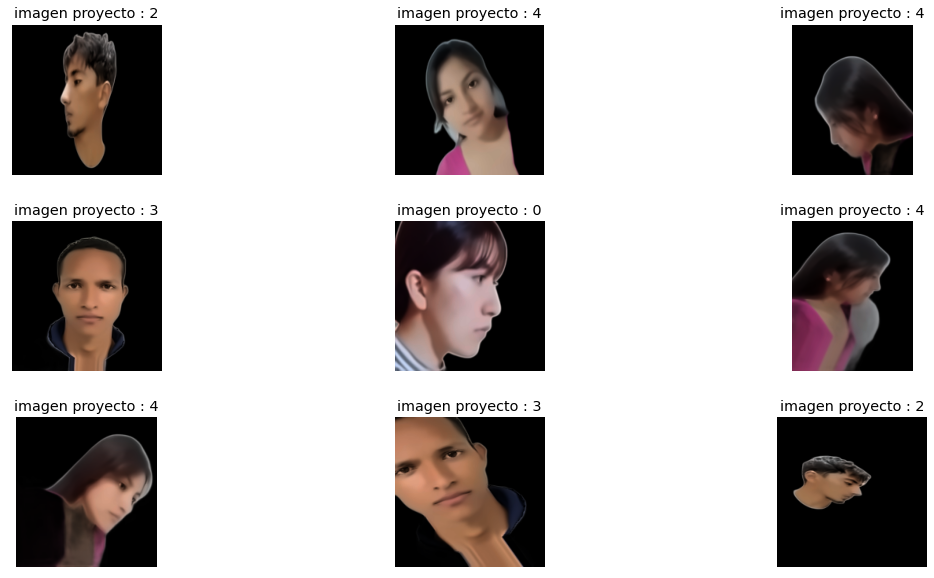

In [45]:
display_rand_images(images, labels)

In [46]:
""" se define la cantidad de datos tanto oara el entrenamiento como para las pruebas con un valor de 80 y 20"""

train_ds, test_ds, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("train_ds shape = ",train_ds.shape)
print("train_labels shape = ",train_labels.shape)
print("\ntest_ds shape = ",test_ds.shape)
print("test_labels shape = ",test_labels.shape)

train_ds shape =  (122,)
train_labels shape =  (122,)

test_ds shape =  (31,)
test_labels shape =  (31,)


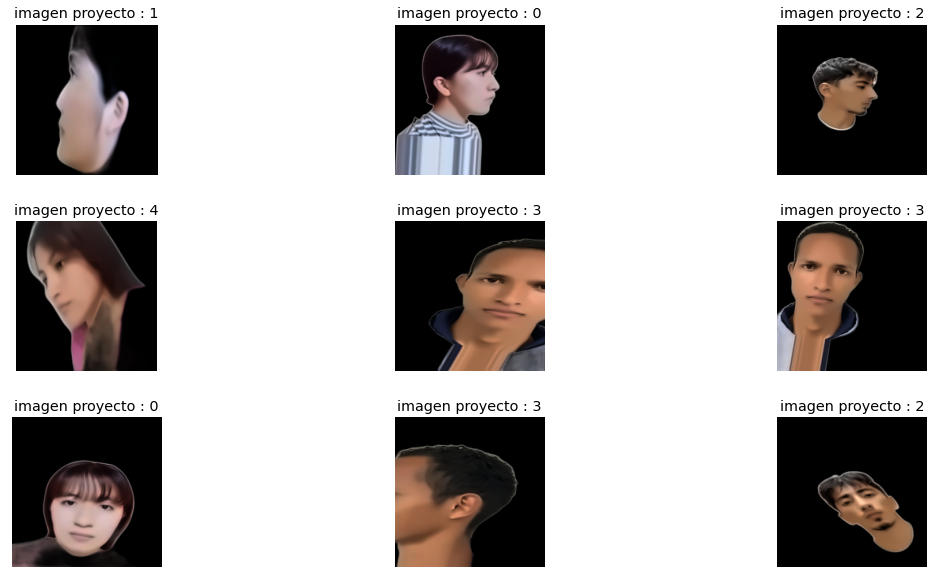

In [47]:
display_rand_images(train_ds, train_labels)

##  AlexNet CNN Arquitectura 

Para el reconocimiento de las imagenes se utiliza AlexNet. Resuelve el problema de la clasificación de imágenes con un subconjunto del conjunto de datos de ImageNet, procesar datos de píxeles. Para esta arquitectura usamos 5 capas convolucionales y 3 capas totalmente conectadas.Lo cual especificamos para cada uno de las etiquetas anteriormente detalladas.

In [55]:
#Programando las capas de la arquitectura AlexNet

In [3]:

""" Primera capa tamaño de kernel 11x11
se normaliza para evitar que las imagenes tengan distancias muy diferentes"""
# (3) Create a sequential model
model = Sequential()

# 1 primero Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling capa de agrupación (max-pooling) 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Normalización por lotes antes de pasarlo a la siguiente capa
model.add(BatchNormalization())



In [4]:
"""Segunda capa con tamaño de kernel 5x5"""
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

In [5]:
"""Tercera capa con tamaño de kernel 3x3"""
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

In [6]:
"""cuarta capa con tamaño de kernel 3x3"""
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

In [7]:
"""quinta capa con tamaño de kernel 3x3"""
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# capa de agrupación (max-pooling) de 3×3
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())


In [8]:


"""Pasarlo a una capa densa"""
model.add(Flatten())


"""# 1ra Capa Densa"""
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))


""" Agreguamos Dropout para evitar el sobreajuste"""
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())


"""2da Capa Densa"""
model.add(Dense(4096))
model.add(Activation('relu'))

""" Agreguamos Dropout para evitar el sobreajuste"""
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

"""capa de salida"""
model.add(Dense(1000))

model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_1 (Activation)    (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0

 ## Deje de entrenar cuando una métrica monitoreada haya dejado de mejorar

Aplicamos la detención temprana que es un método que le permite especificar una gran cantidad arbitraria de épocas de entrenamiento y detener el entrenamiento una vez que el rendimiento del modelo deja de mejorar en un conjunto de datos de validación de espera.

In [16]:
"""para agregar detención anticipada para sobreajustar modelos de redes neuronales de aprendizaje profundo."""
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [49]:
"""Se implementa los argumentos de EarlyStopping minimizar para la pérdida. Con esto, la métrica a monitorear sería 'loss', y el modo sería 'min'"""
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# Esta devolución de llamada detendrá el entrenamiento cuando no haya mejoras en
# la pérdida por tres épocas consecutivas.
model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.SGD(), loss='mse')
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=10, batch_size=1, callbacks=[callback],
                    verbose=0)
len(history.history['loss'])  # Only 4 epochs are run.


4